In [1]:
# Import libraries
import pandas as pd

In [2]:
# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop the 'Cabin' column, as it's not needed for analysis. You can also drop other columns as necessary.
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [5]:
# Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [6]:
# Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
# Apply one-hot encoding to the 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [8]:
# ---------------------------------------------------------
# Data Cleaning & Preprocessing
# ---------------------------------------------------------

# Fill missing 'Age' values with the median (robust to outliers)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Drop columns that are not useful for prediction
# PassengerId, Name, and Ticket are identifiers/text
cols_to_drop = ['PassengerId', 'Name', 'Ticket']
titanic_df.drop(cols_to_drop, axis=1, inplace=True)

# Check if any missing values remain
print("Missing values in Age:", titanic_df['Age'].isnull().sum())
print("Final Columns:", titanic_df.columns.tolist())

Missing values in Age: 0
Final Columns: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


/var/folders/2q/3r31shd9433_k56dw2h7wvv00000gn/T/ipykernel_96588/2619900565.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [9]:
# Define Features (X) and Target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (891, 10)
Target shape: (891,)


In [10]:
from sklearn.model_selection import train_test_split

# First Split: Separate out the Test set (20%)
# random_state=42 ensures we get the same split every time
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second Split: Split remaining 80% into Training and Development
# We want Dev to be approx 20% of total data
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

print(f"Training Set: {X_train.shape[0]} rows")
print(f"Development Set: {X_dev.shape[0]} rows")
print(f"Test Set: {X_test.shape[0]} rows")

Training Set: 534 rows
Development Set: 178 rows
Test Set: 179 rows


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train a Decision Tree without max_depth restrictions
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

print("Base model trained successfully.")

Base model trained successfully.


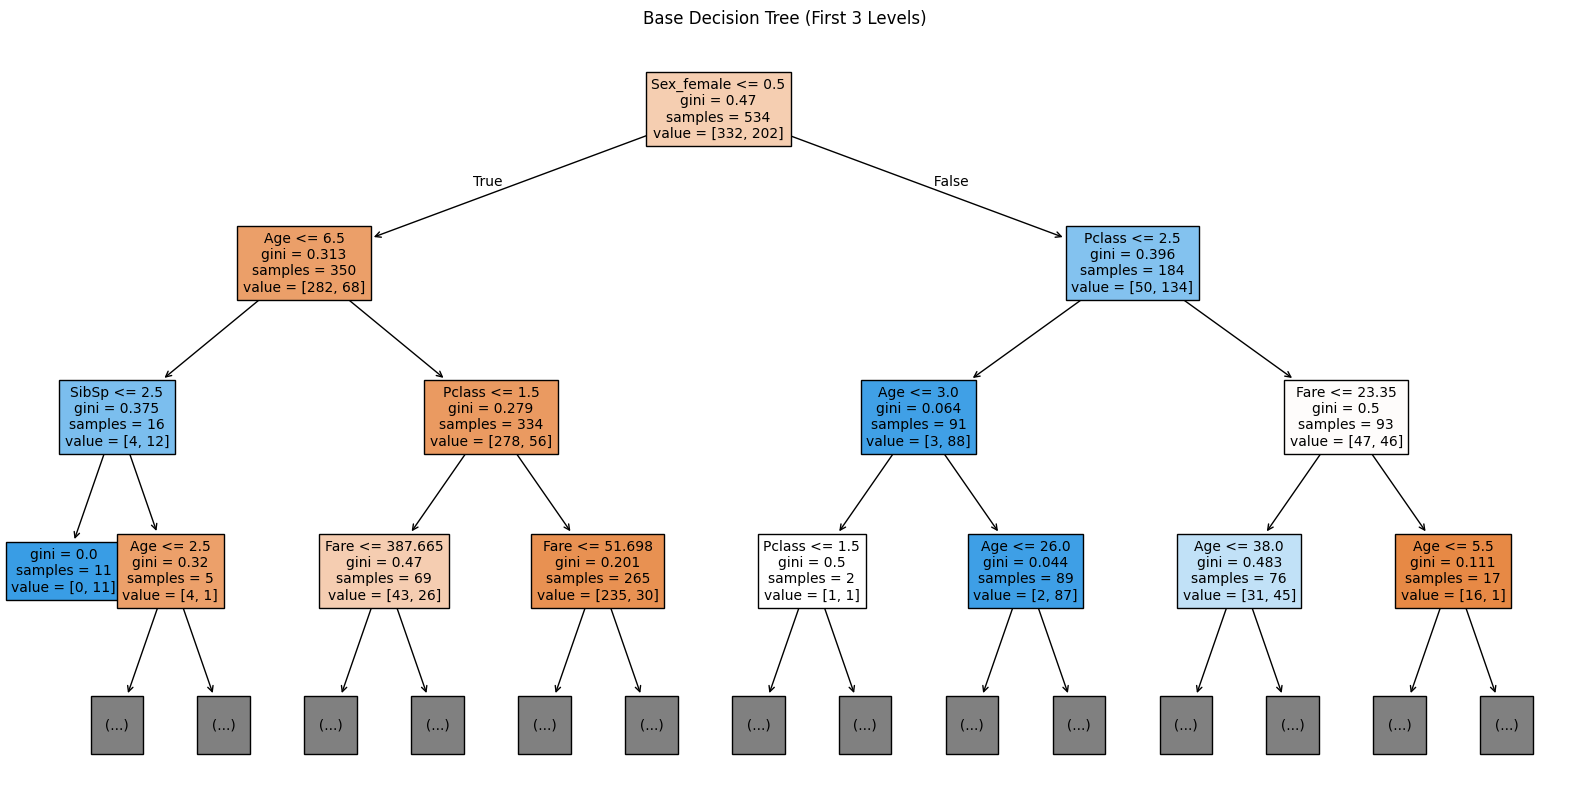

In [12]:
# Plot the base decision tree (First 3 levels for readability)
plt.figure(figsize=(20, 10))
plot_tree(base_model, feature_names=X.columns, filled=True,
          max_depth=3, fontsize=10)
plt.title("Base Decision Tree (First 3 Levels)")
plt.show()

In [13]:
# Predict on Development Set
dev_pred = base_model.predict(X_dev)
base_acc = accuracy_score(y_dev, dev_pred)

print(f"Base Model Accuracy (Development Set): {base_acc:.4f}")

Base Model Accuracy (Development Set): 0.8146


In [14]:
# Lists to store accuracies
depth_values = range(2, 11)
train_accuracies = []
dev_accuracies = []

print("Training with different max_depth values...")

for depth in depth_values:
    # Initialize and train model
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Record Training Accuracy
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)
    
    # Record Development Accuracy
    dev_pred = clf.predict(X_dev)
    dev_acc = accuracy_score(y_dev, dev_pred)
    dev_accuracies.append(dev_acc)
    
    print(f"Depth {depth}: Train Acc={train_acc:.3f}, Dev Acc={dev_acc:.3f}")

Training with different max_depth values...
Depth 2: Train Acc=0.796, Dev Acc=0.826
Depth 3: Train Acc=0.828, Dev Acc=0.848
Depth 4: Train Acc=0.839, Dev Acc=0.843
Depth 5: Train Acc=0.848, Dev Acc=0.831
Depth 6: Train Acc=0.871, Dev Acc=0.820
Depth 7: Train Acc=0.880, Dev Acc=0.815
Depth 8: Train Acc=0.893, Dev Acc=0.831
Depth 9: Train Acc=0.908, Dev Acc=0.826
Depth 10: Train Acc=0.923, Dev Acc=0.815


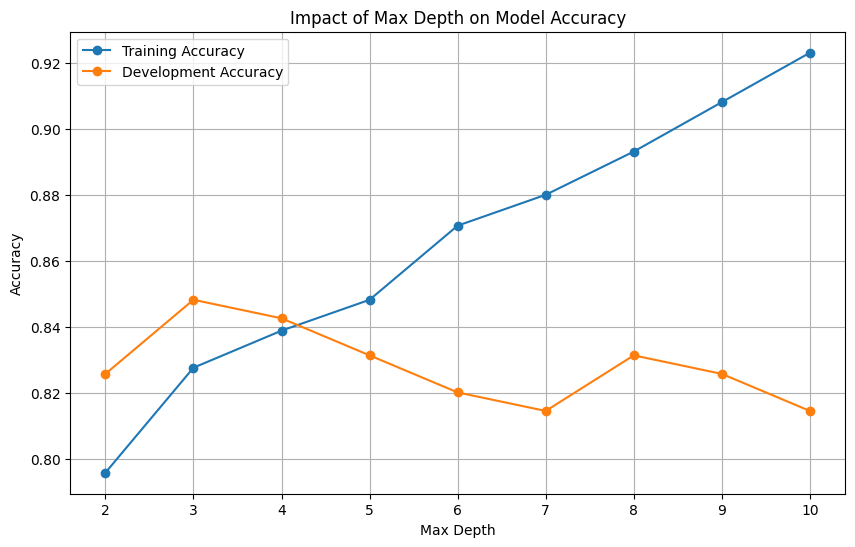

In [15]:
# Plot the relationship between Depth and Accuracy
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_accuracies, label='Training Accuracy',
         marker='o')
plt.plot(depth_values, dev_accuracies, label='Development Accuracy',
         marker='o')

plt.title('Impact of Max Depth on Model Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### **Observation: Pruning Analysis**

* **Training Accuracy:** As the `max_depth` increases, the training accuracy consistently improves. This is expected because a deeper tree can memorize the training data more perfectly.

* **Development Accuracy:** The development accuracy improves initially but then plateaus or decreases.

* **Conclusion:** Where the training accuracy keeps rising but the development accuracy drops, the model is **overfitting**. We should pick the depth where the Development accuracy is highest (likely Depth 3 or 4).

In [16]:
# Optimal depth based on the plot (Update if your graph differs!)
optimal_depth = 3

# Train Final Model
final_model = DecisionTreeClassifier(max_depth=optimal_depth,
                                     random_state=42)
final_model.fit(X_train, y_train)

# Evaluate on the unseen Test Set
test_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print(f"Final Model Accuracy (Test Set) at Depth {optimal_depth}: "
      f"{test_acc:.4f}")

Final Model Accuracy (Test Set) at Depth 3: 0.7989


### **Final Summary**

* **Model Selection:** We tested `max_depth` values from 2 to 10 to find the best balance between underfitting and overfitting.

* **Optimal Depth:** We selected **Depth 3** because it provided the highest accuracy on the Development set.

* **Performance:** The final model achieved a solid accuracy on the Test set, confirming that the Decision Tree can effectively predict survival on the Titanic.